In [53]:
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython
import urllib
from keras import models
from keras import layers
import seaborn as sns
%load_ext autoreload
%autoreload 2

from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
hop_length = 512

In [4]:
audio_file, sr = librosa.load('data/file_example_WAV_1MG.wav')

In [6]:
IPython.display.Audio(audio_file, rate=sr)

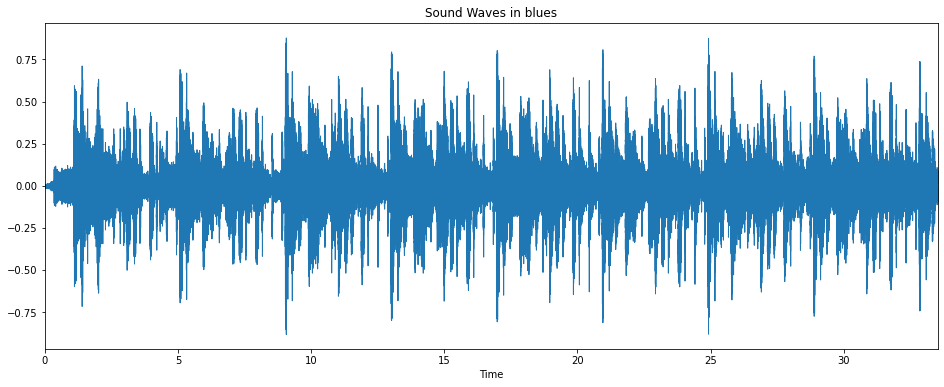

In [7]:
plt.figure(figsize = (16, 6))
librosa.display.waveplot(y = audio_file, sr = sr);
plt.title(f'Sound Waves in blues');

In [ ]:
mfccs = librosa.feature.mfcc(y=audio_file, sr=sr, n_mfcc=13)

pd.DataFrame(mfccs)



In [75]:
def split_mfcc(mfcc, frame=1296, hop_length=1296/2):
    mfcc_len = mfcc.shape[1]
    if mfcc_len < frame:
        raise Exception('Audio file too short')    
    if mfcc_len == frame:
        return [mfcc], [1]
    
    mfcc_t = mfcc.T
    mfccs = []
    n_frames = 1 + int((mfcc_len - frame) // hop_length)
    for i in range(0, n_frames):
        start = i * hop_length
        end = (i + 1) * hop_length
        mfccs.append(mfcc_t[start:end].T)
    ranks = [1/2] + [1] * (n_frames - 1)

    rest = mfcc_len % hop_length
    if rest != 0:
        start = mfcc_len - hop_length
        mfccs.append(mfcc_t[start:].T)
        ranks.append(rest/frame)

    return mfccs, ranks

audio_file, sr = librosa.load('data/country/country.00000.wav')
mfccs = librosa.feature.mfcc(y=audio_file, sr=sr, n_mfcc=13)

mfcc = mfccs.T[:9].T
pd.DataFrame(mfcc)
res, ranks = split_mfcc(mfcc, 4, 2)
print(len(res))
for i in ranks:
    print(i)

4
0.5
1
1
0.25


/Users/reastyn/fit/ni-mvv/ni-vmm-music-genre-classification/venv/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/reastyn/fit/ni-mvv/ni-vmm-music-genre-classification/venv/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/reastyn/fit/ni-mvv/ni-vmm-music-genre-classification/venv/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


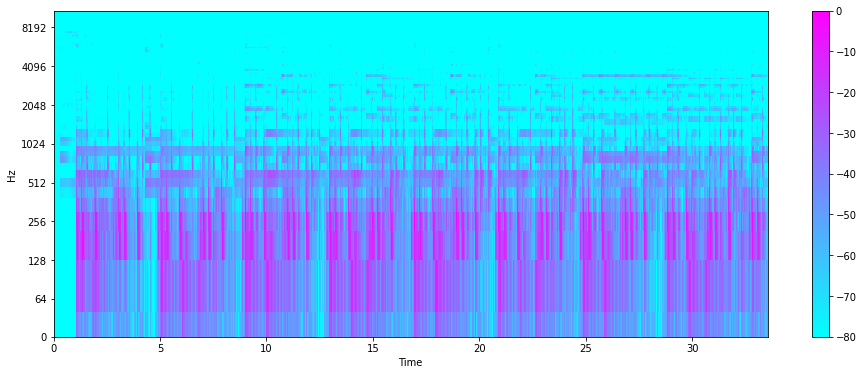

In [31]:
y, _ = librosa.effects.trim(audio_file)

S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log', cmap = 'cool')
plt.colorbar()

In [9]:
mfccs = librosa.feature.mfcc(y=audio_file, sr=sr, n_mfcc=13)
pd.DataFrame(mfccs)

0           1           2           3           4           5     \
0  -408.619659 -400.925232 -394.545624 -387.017090 -382.675842 -379.572571   
1    78.386612   80.360237   80.329636   83.514938   86.841995   85.228737   
2   -13.216302  -15.782559  -20.809044  -26.127518  -25.598234  -27.703436   
3   -11.397064   -7.717999   -4.218303   -4.928361   -3.100256    4.824153   
4   -18.910089  -18.072678  -15.569483  -10.343307   -9.179008   -2.174536   
5   -39.027328  -39.339737  -41.196648  -38.877666  -40.440144  -40.078861   
6   -18.916061  -15.592827  -11.751121  -11.712566  -11.940798  -11.807535   
7    -7.169601   -6.899277   -1.368143    0.457329    1.046798   -1.626116   
8    -6.002582   -6.237197   -6.323171   -3.719326   -6.210669  -13.589496   
9    12.955400   12.086758    9.797090   12.916115   10.579334    5.420040   
10   14.135678    8.040015    7.243631    6.992674    5.012947    5.602042   
11   -0.120605   -2.125730    0.313559   -7.132652  -13.874089  -10.250109   
12   -3.287555   -1.110577    3.408871   -2.348907   -8.685358   -7.079857   

          6           7           8           9     ...        1435  \
0  -376.042786 -373.760773 -359.035858 -348.094849  ... -174.463013   
1    82.083191   79.308136   86.110367   87.780640  ...  223.486038   
2   -33.947227  -38.501656  -44.899036  -52.414604  ...  -43.458530   
3     7.656371    8.104300    7.114987   10.145291  ...   36.151730   
4    -1.333606   -3.894485   -4.342632   -1.900593  ...   40.050446   
5   -44.516899  -46.388504  -49.196835  -51.838116  ...  -36.386482   
6   -12.815031  -10.304939   -8.229029   -6.036761  ...    8.254059   
7    -2.646286   -3.335759    0.084086    1.471545  ...   13.648514   
8   -15.579285  -14.283463  -11.341366  -14.198141  ...  -13.090070   
9     7.699838   12.370934   15.875765   15.275444  ...    9.691658   
10    9.549377    6.421475    4.577032    7.060606  ...  -10.597092   
11   -6.276076  -11.468773  -15.781304  -10.696873  ...  -19.370956   
12   -3.583321   -2.544643   -2.781090    1.498366  ...   14.304255   

          1436        1437        1438        1439        1440        1441  \
0  -193.794495 -224.677826 -253.271805 -267.065613 -272.616852 -282.030884   
1   210.097046  190.868835  181.105682  176.328278  173.079102  165.790405   
2   -38.610519  -30.426441  -15.261158   -9.411296  -11.694374   -9.160118   
3    42.281746   45.797264   44.024475   39.535091   27.015217   29.893711   
4    44.474247   44.538307   42.086136   38.426201   25.744427   22.981159   
5   -28.882149  -24.693562  -20.002266  -16.890865  -16.310860  -19.459400   
6    16.074070   17.445026   15.617749   15.363523   16.985682   15.720199   
7    15.608744   18.388674   21.942181   22.805523   18.538979   18.213276   
8   -17.673561  -10.468711   -3.442795    1.256286    2.907995    2.387923   
9     6.903993   11.900945    9.628054   12.161722   16.650145   11.075247   
10   -7.404273   -3.633117   -4.681323   -2.547929   -2.524137   -7.077444   
11  -15.794315  -11.035839   -8.433178   -6.915403   -4.668826    1.524339   
12   16.556055   20.291365   20.998032   20.191639   22.462967   28.557909   

          1442        1443        1444  
0  -293.641632 -293.544281 -290.219635  
1   161.396347  165.793213  169.233948  
2    -0.376599    4.968586    3.966651  
3    36.148125   34.770370   28.283970  
4    24.683689   23.636431   18.109482  
5   -20.647980  -15.902033  -13.345995  
6    14.506952   19.061028   25.303093  
7    19.167049   19.024359   21.109579  
8    -1.605905   -4.838564   -5.693364  
9     4.224153    2.396052    0.618342  
10   -8.098674   -8.360618  -12.225773  
11    2.077584   -1.962396   -4.471062  
12   29.421595   24.134403   24.804485  

[13 rows x 1445 columns]

In [30]:
import math

def euclid(a, b):
    return math.sqrt((a-b) ** 2)

def abs_sub(a, b):
    return abs(a-b)


def dtw(v1, v2, dist_fn=euclid):
    v1len, v2len = len(v1), len(v2)
    matrixRows, matrixCols = v1len + 1, v2len + 1
    matrix = np.full((matrixRows, matrixCols), np.inf)
    matrix[0, 0] = 0

    for i in range(1, matrixRows):
        for j in range(1, matrixCols):
            cost = dist_fn(v1[i - 1], v2[j - 1])

            min_three = np.min([matrix[i, j - 1], matrix[i - 1, j], matrix[i - 1, j - 1]])
            matrix[i, j] = cost + min_three

    return matrix[v1len, v2len]

def compare_matrices(m1, m2):
    for v1, v2 in zip(m1, m2):
        dtw(v1, v2, euclid)

v1 = np.array([1,2,4,3,5,3,2,3,2,5])
v2 = np.array([1,1,2,4,3,5,3,2,3,2])

dtw(v1, v2, euclid)
# pd.DataFrame(dtw_c(v1, v2, euclid), index=[0, 1,2,4,3,5,3,2,3,2,5], columns=[0, 1,1,2,4,3,5,3,2,3,2])

3.0

In [38]:
from dtw import dtw

In [5]:
df = pd.read_csv('preprocessed_nmfcc_13/data.csv', header=None, names=['file', 'label'])
df

file  label
0    preprocessed_nmfcc_13/blues/blues.00000.npy  blues
1    preprocessed_nmfcc_13/blues/blues.00001.npy  blues
2    preprocessed_nmfcc_13/blues/blues.00002.npy  blues
3    preprocessed_nmfcc_13/blues/blues.00003.npy  blues
4    preprocessed_nmfcc_13/blues/blues.00004.npy  blues
..                                           ...    ...
995    preprocessed_nmfcc_13/rock/rock.00095.npy   rock
996    preprocessed_nmfcc_13/rock/rock.00096.npy   rock
997    preprocessed_nmfcc_13/rock/rock.00097.npy   rock
998    preprocessed_nmfcc_13/rock/rock.00098.npy   rock
999    preprocessed_nmfcc_13/rock/rock.00099.npy   rock

[1000 rows x 2 columns]

In [6]:
from sklearn.model_selection import train_test_split, GroupShuffleSplit

X = df[['file']]
y = df[['label']]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=42)
train = pd.merge(X_train, y_train, left_index=True, right_index=True)

In [7]:
from audio_classification.dtwclassifier.dtwclassifier import DTWClassifier
import numpy as np
from dtw import dtw, accelerated_dtw
import pandas as pd
# from audio_classification.classifier.util import split_mfcc

In [35]:

cls = DTWClassifier(DTWClassifier.MODE_MEAN, 5)
cls.fit(X_train, y_train)

def split_mfcc(mfcc, frame_length):
    hop_length = frame_length // 2
    mfcc_len = mfcc.shape[1]
    if mfcc_len < frame_length:
        raise Exception('Audio file too short')
    if mfcc_len == frame_length:
        return [mfcc], [1]

    mfcc_t = mfcc.T
    mfccs = []
    n_frames = 1 + int((mfcc_len - frame_length) // hop_length)
    for i in range(0, n_frames):
        start = i * hop_length
        end = start + frame_length
        mfccs.append(mfcc_t[start:end].T)
#     ranks = [1 / 2] + [1] * (n_frames - 1)

    rest = mfcc_len % hop_length
    if rest != 0:
        start = mfcc_len - frame_length
        mfccs.append(mfcc_t[start:].T)
#         ranks.append(rest / frame_length)

    return np.array(mfccs)

def classify_mfcc(mfcc):
    mfccs = split_mfcc(mfcc, 1296)
    display(pd.DataFrame(mfccs[0]))
    result = list(map(lambda mfcc: cls.classify(mfcc), mfccs))
    return max(set(result), key = result.count)
    

mf = librosa.feature.mfcc(y=audio_file, sr=sr, n_mfcc=13)
print(mf.shape)
pd.DataFrame(mf)
classify_mfcc(mf)

(13, 1445)


0           1           2           3           4           5     \
0  -408.619659 -400.925232 -394.545624 -387.017090 -382.675842 -379.572571   
1    78.386612   80.360237   80.329636   83.514938   86.841995   85.228737   
2   -13.216302  -15.782559  -20.809044  -26.127518  -25.598234  -27.703436   
3   -11.397064   -7.717999   -4.218303   -4.928361   -3.100256    4.824153   
4   -18.910089  -18.072678  -15.569483  -10.343307   -9.179008   -2.174536   
5   -39.027328  -39.339737  -41.196648  -38.877666  -40.440144  -40.078861   
6   -18.916061  -15.592827  -11.751121  -11.712566  -11.940798  -11.807535   
7    -7.169601   -6.899277   -1.368143    0.457329    1.046798   -1.626116   
8    -6.002582   -6.237197   -6.323171   -3.719326   -6.210669  -13.589496   
9    12.955400   12.086758    9.797090   12.916115   10.579334    5.420040   
10   14.135678    8.040015    7.243631    6.992674    5.012947    5.602042   
11   -0.120605   -2.125730    0.313559   -7.132652  -13.874089  -10.250109   
12   -3.287555   -1.110577    3.408871   -2.348907   -8.685358   -7.079857   

          6           7           8           9     ...        1286  \
0  -376.042786 -373.760773 -359.035858 -348.094849  ... -230.895355   
1    82.083191   79.308136   86.110367   87.780640  ...  199.016830   
2   -33.947227  -38.501656  -44.899036  -52.414604  ...  -18.172379   
3     7.656371    8.104300    7.114987   10.145291  ...   34.480347   
4    -1.333606   -3.894485   -4.342632   -1.900593  ...   36.098862   
5   -44.516899  -46.388504  -49.196835  -51.838116  ...  -15.668522   
6   -12.815031  -10.304939   -8.229029   -6.036761  ...   28.852119   
7    -2.646286   -3.335759    0.084086    1.471545  ...   31.415134   
8   -15.579285  -14.283463  -11.341366  -14.198141  ...    0.672289   
9     7.699838   12.370934   15.875765   15.275444  ...   16.354673   
10    9.549377    6.421475    4.577032    7.060606  ...    2.653040   
11   -6.276076  -11.468773  -15.781304  -10.696873  ...   -3.999205   
12   -3.583321   -2.544643   -2.781090    1.498366  ...   24.601120   

          1287        1288        1289        1290        1291        1292  \
0  -236.828674 -240.412369 -241.201187 -226.625214 -218.357758 -231.925201   
1   194.133759  192.307220  191.108597  202.655151  211.050842  208.570740   
2   -16.958916  -16.853882  -18.291122  -19.055294  -17.713680   -3.310296   
3    37.871437   37.088646   34.607967   32.165939   31.185289   37.622986   
4    38.361198   39.609512   36.610634   34.875095   36.482456   37.416241   
5   -14.949882  -15.790276  -16.102238  -18.562183  -19.149462  -13.568851   
6    27.526819   22.963093   25.336653   23.856552   19.749325   25.325901   
7    30.335281   29.956055   31.370443   29.105928   26.109711   29.934780   
8     2.130072    4.892501    5.531101    1.740748   -1.820000   -0.195129   
9    16.201250   17.070312   18.605928   16.923016   12.423381    8.153736   
10   -0.405917    1.127773    1.627032    1.732021   -0.166790   -6.367105   
11   -5.071113   -4.428193   -5.379861   -6.082501   -8.175350  -10.511713   
12   24.624832   22.159140   21.583427   20.286934   16.612183   16.513948   

          1293        1294        1295  
0  -243.930557 -253.999054 -236.854446  
1   199.571320  193.254669  204.193787  
2    -0.524535    1.030055   -7.471410  
3    41.749966   40.635330   30.647635  
4    38.417316   37.024349   35.397026  
5   -12.179474  -11.017397   -8.234437  
6    26.815926   27.435757   29.680737  
7    30.212074   31.771439   29.493334  
8    -0.314692    2.774121   -0.814315  
9     6.149261    8.778324   12.121939  
10   -9.171736   -5.274957   -0.459494  
11  -10.172548   -5.418771   -7.656800  
12   17.679708   20.402397   19.804150  

[13 rows x 1296 columns]

'jazz'

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import ParameterGrid

params = ParameterGrid({
    'mode': [DTWClassifier.MODE_MEAN, DTWClassifier.MODE_MIN],
    'n_compared_songs': range(5, 30 + 1, 5)
})

res = []
for param in params:
    print(param)
    cls = DTWClassifier(train, param['mode'], param['n_compared_songs'])
    resdf = cls.classify(X_valid)
    res.append({
        'accurancy': accuracy_score(y_valid, resdf),
        'mode': param['mode'],
        'n_compared_songs': param['n_compared_songs']
    })

{'mode': 'MEAN', 'n_compared_songs': 5}
{'mode': 'MEAN', 'n_compared_songs': 10}
{'mode': 'MEAN', 'n_compared_songs': 15}
{'mode': 'MEAN', 'n_compared_songs': 20}
{'mode': 'MEAN', 'n_compared_songs': 25}
{'mode': 'MEAN', 'n_compared_songs': 30}
{'mode': 'MIN', 'n_compared_songs': 5}
{'mode': 'MIN', 'n_compared_songs': 10}
{'mode': 'MIN', 'n_compared_songs': 15}
{'mode': 'MIN', 'n_compared_songs': 20}
{'mode': 'MIN', 'n_compared_songs': 25}
{'mode': 'MIN', 'n_compared_songs': 30}


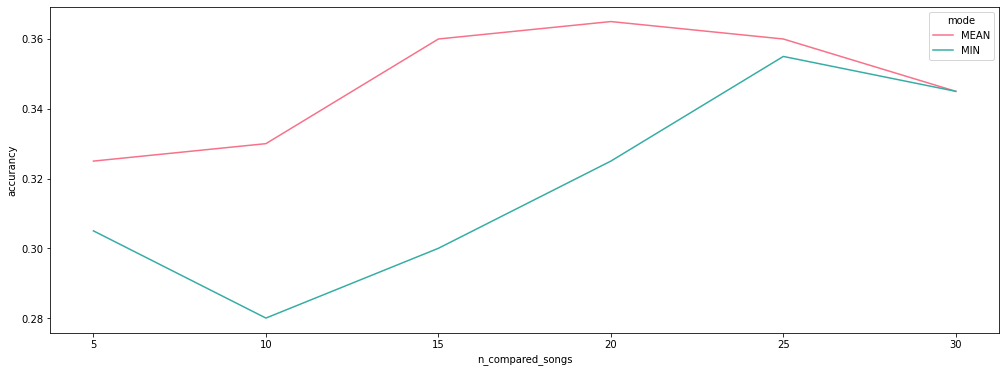

In [18]:
dtw_accurancy = pd.DataFrame(res)
fig, axs = plt.subplots(figsize=(17,6))
ax = sns.lineplot(data=dtw_accurancy, x='n_compared_songs', y="accurancy", hue="mode", palette="husl")

plt.savefig(f"graphs/dtw-accurancy.pdf", format="pdf", bbox_inches="tight")

In [31]:
def plot_loss_accuracy(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, max(1, historydf.values.max())))
    loss = history.history['loss'][-1]
    acc = history.history['accuracy'][-1]
    plt.title('Loss: %.3f, Accuracy: %.3f' % (loss, acc))

In [45]:
df = pd.read_csv('preprocessed_nmfcc_13/data.csv', header=None, names=['file_name', 'genre'])
df

file_name  genre
0    preprocessed_nmfcc_13/blues/blues.00000.npy  blues
1    preprocessed_nmfcc_13/blues/blues.00001.npy  blues
2    preprocessed_nmfcc_13/blues/blues.00002.npy  blues
3    preprocessed_nmfcc_13/blues/blues.00003.npy  blues
4    preprocessed_nmfcc_13/blues/blues.00004.npy  blues
..                                           ...    ...
995    preprocessed_nmfcc_13/rock/rock.00095.npy   rock
996    preprocessed_nmfcc_13/rock/rock.00096.npy   rock
997    preprocessed_nmfcc_13/rock/rock.00097.npy   rock
998    preprocessed_nmfcc_13/rock/rock.00098.npy   rock
999    preprocessed_nmfcc_13/rock/rock.00099.npy   rock

[1000 rows x 2 columns]

In [46]:
def transform_mfcc(file):
    mfcc = np.load(file)
    res = {}
    for i, vec in enumerate(mfcc):
        res['mfcc' + str(i)] = np.mean(vec)
    return pd.Series(res)
y = df[['genre']]
X = df['file_name'].apply(transform_mfcc)

In [96]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(X, dtype = float))

label_encoding = {
    'blues': 0,
    'classical': 1,
    'country': 2,
    'disco': 3,
    'hiphop': 4,
    'jazz': 5,
    'metal': 6,
    'pop': 7,
    'reggae': 8,
    'rock': 9
}

encoder = LabelEncoder()
encoder.set_params(**label_encoding)
y = encoder.fit_transform(y)
encoder

ValueError: Invalid parameter blues for estimator LabelEncoder(). Check the list of available parameters with `estimator.get_params().keys()`.

In [66]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=42)

0         1         2         3         4         5         6   \
0   -0.890824  0.052522  1.225618 -0.753576  0.263992  0.955360 -1.191688   
1   -1.172096  2.649954 -0.367688  0.813964 -0.004950 -0.702170  1.121425   
2    1.088424 -0.174306 -0.705533  0.421400 -1.247243  1.257159 -0.073685   
3   -1.033726  0.843104 -0.170141 -0.361363  0.005700 -1.424738  0.710340   
4   -0.920092 -0.251200  0.498278  0.551453  0.198405  1.490175  1.427104   
..        ...       ...       ...       ...       ...       ...       ...   
795 -1.510308  1.117175 -0.623126  0.267266 -0.387257 -0.454456 -0.677922   
796  0.450919  0.575128 -0.965983  0.273584 -1.154309  1.128119 -0.687299   
797 -1.567055 -0.712862 -0.216426  0.181152  0.225566  0.190954 -0.214387   
798  0.435529 -1.128533  1.002727 -0.584512  1.130624 -0.207158  0.758195   
799 -0.906183  1.327014 -1.187760 -0.319748 -1.247228  0.716374 -0.593943   

           7         8         9         10        11        12  
0    0.474314 -1.845861 -0.421563 -2.520914 -1.565505 -0.042356  
1   -1.818559 -0.399898 -1.378979  0.097230 -1.195153  0.308500  
2    1.752270 -0.841242  0.757981 -0.465923  1.656244 -0.599560  
3   -0.945662  1.170903 -1.528920 -0.062156 -1.633999  0.130433  
4    0.907844  0.234079  0.407825  0.296485  0.454849  0.723024  
..        ...       ...       ...       ...       ...       ...  
795 -0.366515 -0.224914 -0.420490 -0.491828 -0.060902  1.044458  
796  0.307042 -0.528830  0.353168 -0.399244  0.587608 -0.331094  
797 -1.313107  0.983297 -1.387324 -0.354138 -1.202533  0.353816  
798  0.801689  1.034212  0.542386  0.656009  0.334054  1.406621  
799 -0.237185 -1.451474 -0.442481 -0.852197  0.661479  0.545516  

[800 rows x 13 columns]

In [49]:
model = models.Sequential()

model.add(layers.Dense(1024, activation='relu', input_shape=(13,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [50]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [107]:
history = model.fit(X_train,
          y_train,
          epochs=100,
          batch_size=16,
          validation_data=(X_valid, y_valid))

Epoch 1/100
50/50 [==============================] - 0s 4ms/step - loss: 0.5409 - accuracy: 0.8175 - val_loss: 1.5851 - val_accuracy: 0.5400
Epoch 2/100
50/50 [==============================] - 0s 4ms/step - loss: 0.4560 - accuracy: 0.8325 - val_loss: 1.5667 - val_accuracy: 0.5550
Epoch 3/100
50/50 [==============================] - 0s 4ms/step - loss: 0.4415 - accuracy: 0.8425 - val_loss: 1.6115 - val_accuracy: 0.5800
Epoch 4/100
50/50 [==============================] - 0s 4ms/step - loss: 0.3737 - accuracy: 0.8700 - val_loss: 1.8668 - val_accuracy: 0.5200
Epoch 5/100
50/50 [==============================] - 0s 4ms/step - loss: 0.3892 - accuracy: 0.8462 - val_loss: 1.6968 - val_accuracy: 0.5650
Epoch 6/100
50/50 [==============================] - 0s 4ms/step - loss: 0.3473 - accuracy: 0.8737 - val_loss: 1.8252 - val_accuracy: 0.5550
Epoch 7/100
50/50 [==============================] - 0s 4ms/step - loss: 0.2922 - accuracy: 0.9075 - val_loss: 1.7977 - val_accuracy: 0.6100
Epoch 8/100
5

Epoch 59/100
50/50 [==============================] - 0s 4ms/step - loss: 0.0097 - accuracy: 0.9975 - val_loss: 3.1155 - val_accuracy: 0.5850
Epoch 60/100
50/50 [==============================] - 0s 4ms/step - loss: 0.0052 - accuracy: 0.9987 - val_loss: 3.1490 - val_accuracy: 0.5750
Epoch 61/100
50/50 [==============================] - 0s 4ms/step - loss: 0.0064 - accuracy: 0.9975 - val_loss: 3.1612 - val_accuracy: 0.5800
Epoch 62/100
50/50 [==============================] - 0s 4ms/step - loss: 0.0037 - accuracy: 0.9987 - val_loss: 3.1809 - val_accuracy: 0.5900
Epoch 63/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 0.9987 - val_loss: 3.2189 - val_accuracy: 0.5800
Epoch 64/100
50/50 [==============================] - 0s 4ms/step - loss: 0.0038 - accuracy: 0.9987 - val_loss: 3.2298 - val_accuracy: 0.5900
Epoch 65/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 0.9987 - val_loss: 3.2629 - val_accuracy: 0.5950
Epoch 

In [52]:
plot_loss_accuracy(history)

NameError: name 'plot_loss_accuracy' is not defined

In [57]:
audio_file, sr = librosa.load('data/country/country.00000.wav')
mfccs = librosa.feature.mfcc(y=audio_file, sr=sr, n_mfcc=13)


In [113]:
from audio_classification.dnn_simple_classifier.dnn_simple_classifier import DNNSimpleClassifier
cls = DNNSimpleClassifier()
cls.fit(X_train, y_train, validation_data=(X_valid, y_valid))

Epoch 1/100
50/50 [==============================] - 0s 5ms/step - loss: 1.6847 - accuracy: 0.3875 - val_loss: 1.6325 - val_accuracy: 0.4150
Epoch 2/100
50/50 [==============================] - 0s 4ms/step - loss: 1.2519 - accuracy: 0.5500 - val_loss: 1.4642 - val_accuracy: 0.5100
Epoch 3/100
50/50 [==============================] - 0s 4ms/step - loss: 1.1281 - accuracy: 0.6050 - val_loss: 1.5566 - val_accuracy: 0.4750
Epoch 4/100
50/50 [==============================] - 0s 4ms/step - loss: 1.0207 - accuracy: 0.6275 - val_loss: 1.4276 - val_accuracy: 0.5000
Epoch 5/100
50/50 [==============================] - 0s 4ms/step - loss: 0.9242 - accuracy: 0.6712 - val_loss: 1.3883 - val_accuracy: 0.5400
Epoch 6/100
50/50 [==============================] - 0s 4ms/step - loss: 0.8646 - accuracy: 0.6888 - val_loss: 1.3745 - val_accuracy: 0.5700
Epoch 7/100
50/50 [==============================] - 0s 4ms/step - loss: 0.7663 - accuracy: 0.7412 - val_loss: 1.5189 - val_accuracy: 0.5500
Epoch 8/100
5

Epoch 59/100
50/50 [==============================] - 0s 4ms/step - loss: 0.0073 - accuracy: 0.9987 - val_loss: 2.9825 - val_accuracy: 0.5950
Epoch 60/100
50/50 [==============================] - 0s 4ms/step - loss: 0.0076 - accuracy: 0.9975 - val_loss: 3.0121 - val_accuracy: 0.5850
Epoch 61/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 0.9987 - val_loss: 3.0733 - val_accuracy: 0.5900
Epoch 62/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 0.9975 - val_loss: 3.1056 - val_accuracy: 0.5850
Epoch 63/100
50/50 [==============================] - 0s 4ms/step - loss: 0.0054 - accuracy: 0.9975 - val_loss: 3.1474 - val_accuracy: 0.5900
Epoch 64/100
50/50 [==============================] - 0s 4ms/step - loss: 0.0045 - accuracy: 0.9987 - val_loss: 3.1830 - val_accuracy: 0.5800
Epoch 65/100
50/50 [==============================] - 0s 4ms/step - loss: 0.0052 - accuracy: 0.9975 - val_loss: 3.2124 - val_accuracy: 0.5850
Epoch 

In [106]:
audio_file, sr = librosa.load('data/country/country.00000.wav')
mfccs = librosa.feature.mfcc(y=audio_file, sr=sr, n_mfcc=13)
cls.classify(mfccs)

'country'

In [ ]:

from audio_classification.dnn_simple_classifier.dnn_simple_classifier import DNNSimpleClassifierFactory
simple_dnn_classifier = DNNSimpleClassifierFactory.create()

audio_file, sr = librosa.load('data/file_example_WAV_1MG.wav')
